In [19]:
import torch
from torch_scatter import scatter
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams.update({
    'font.size': 40,
    'lines.linewidth': 5,
    'axes.titlepad': 20,
    'axes.linewidth': 2,
})

In [20]:
list_dict = {
    'graph_convolutional_network': {},
    'graph_transformer': {},
}

In [21]:
for key in list_dict.keys():
    path = os.path.join('nc_arrays', key)
    for arr in ['epoch', 's_b', 's_w', 'ratio', 'stn']:
        list_dict[key][arr] = np.loadtxt(os.path.join(path, f'{arr}_arr.txt'))

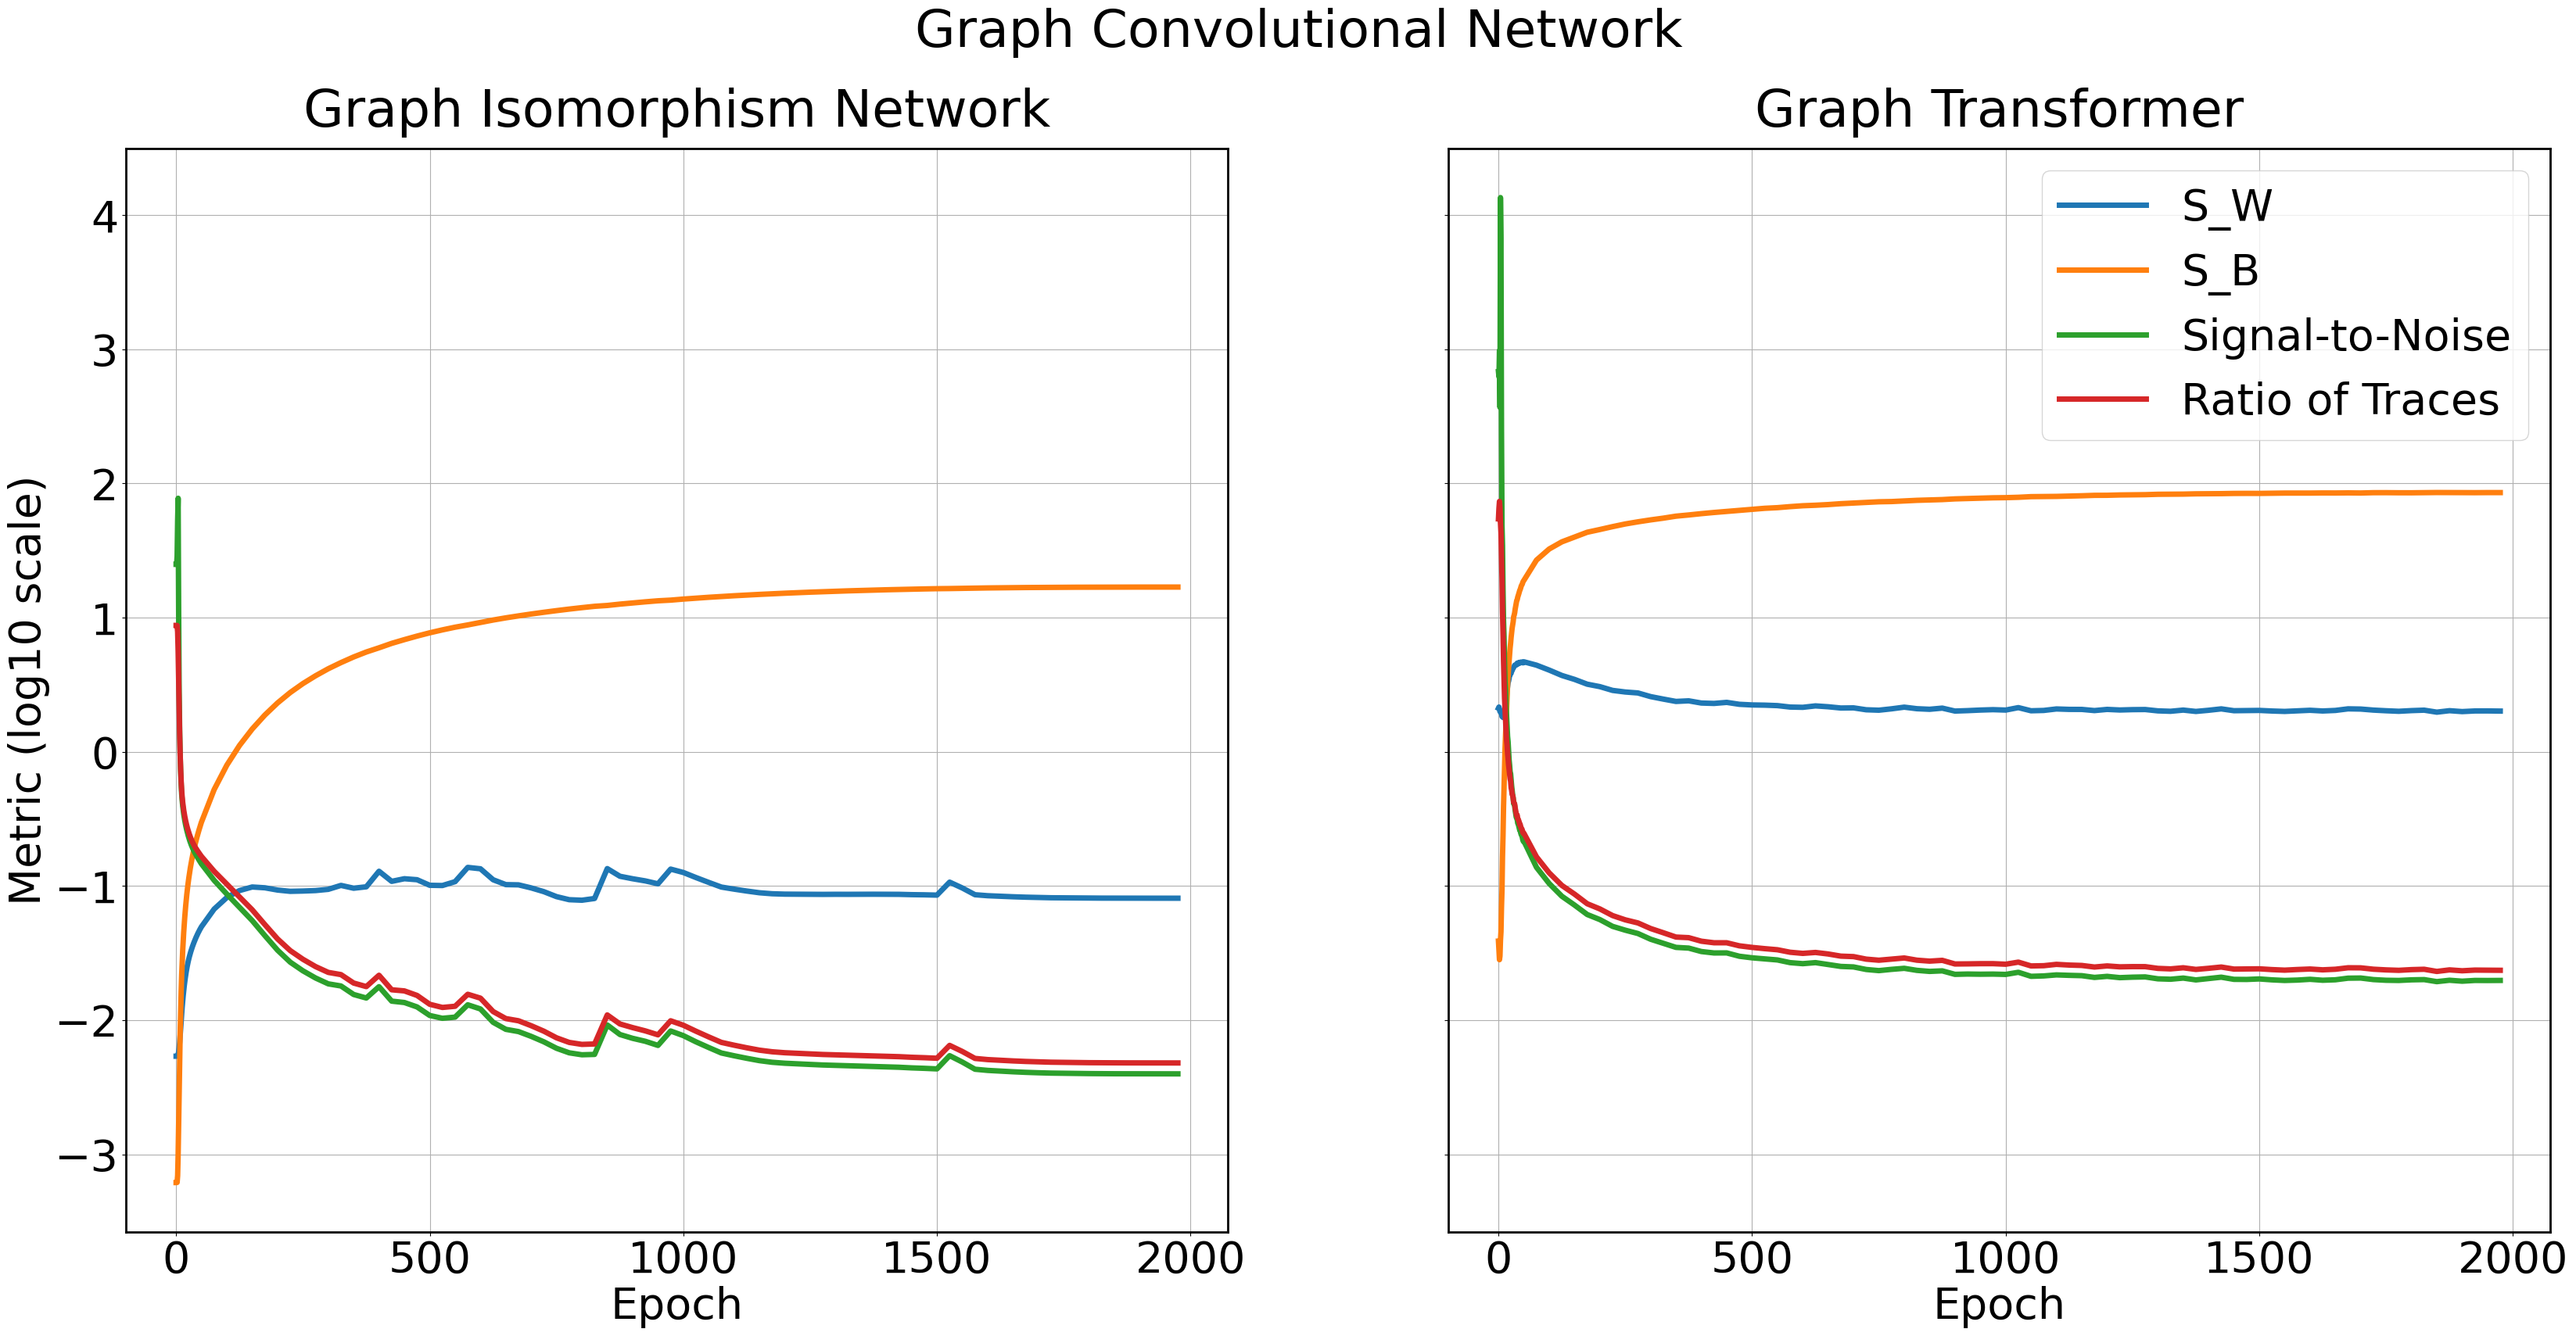

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(40, 18), sharey=True)
for i, mod in enumerate(list_dict.keys()):
    axes[i].plot(list_dict[mod]['epoch'], list_dict[mod]['s_w'], label='S_W')
    axes[i].plot(list_dict[mod]['epoch'], list_dict[mod]['s_b'], label='S_B')
    axes[i].plot(list_dict[mod]['epoch'], list_dict[mod]['stn'], label='Signal-to-Noise')
    axes[i].plot(list_dict[mod]['epoch'], list_dict[mod]['ratio'], label='Ratio of Traces')
    axes[i].grid(True)
    axes[i].set_xlabel('Epoch')
axes[0].set_ylabel('Metric (log10 scale)')
axes[0].set_title('Graph Isomorphism Network')
axes[1].set_title('Graph Transformer')
plt.suptitle('Graph Convolutional Network')
plt.legend()
plt.savefig('sample_plot.png', bbox_inches='tight', pad_inches=0.5)  # 0.5 inches of padding